In [1]:
TA_BLACKLIST = '0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
EN_BLACKLIST = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

FILENAME = { 'dev' : { 'en' : 'data/corpus.bcn.dev.en', 'ta' : 'data/corpus.bcn.dev.ta' },
             'test' : { 'en' : 'data/corpus.bcn.test.en', 'ta' : 'data/corpus.bcn.test.ta'},
             'train' : { 'en' : 'data/corpus.bcn.train.en', 'ta' : 'data/corpus.bcn.train.ta' }
           }

In [5]:
import data
import importlib
importlib.reload(data)

<module 'data' from '/home/suriya/_/tf/datasets/seq2seq/en-ta-parallel-v2/data.py'>

In [6]:
dev_ta_lines = data.read_lines(filename = FILENAME['train']['ta'])
dev_en_lines = data.read_lines(filename = FILENAME['train']['en'])

In [7]:
len(dev_ta_lines)

166871

In [8]:
new_lines = []
for line in dev_ta_lines:
    if '.' in line:
        new_lines.extend(line.split('.'))
    else:
        new_lines.append(line)

In [26]:
new_lines1 = []
for line in dev_en_lines:
    if '.' in line:
        new_lines1.extend(line.split('.'))
    else:
        new_lines1.append(line)

In [28]:
print(len(new_lines))

367626


In [27]:
print(len(new_lines1))

340738


In [11]:
from matplotlib import pyplot as plt
%matplotlib inline
import nltk
import itertools

In [19]:
old_line_dist = [len(line) for line in dev_ta_lines]
new_line_dist = [len(line) for line in new_lines]

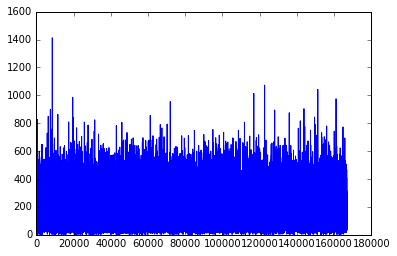

In [24]:
plt.plot(list(range(len(old_line_dist))),old_line_dist)
plt.show()

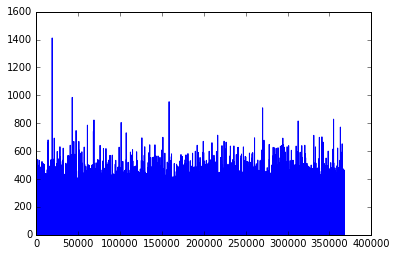

In [25]:
plt.plot(list(range(len(new_line_dist))),new_line_dist)
plt.show()

In [32]:

# change to lower case (just for en)
dev_en_lines = [ line.lower() for line in dev_en_lines ]

dev_ta_lines = [ data.filter_line(line, TA_BLACKLIST) for line in dev_ta_lines ]
dev_en_lines = [ data.filter_line(line, EN_BLACKLIST) for line in dev_en_lines ]

dev_ta_lines, dev_en_lines = data.filter_data(dev_ta_lines, dev_en_lines)

dev_en_w = [ wordlist.split(' ') for wordlist in dev_en_lines ]

#vocab_en, idx2w_en, w2idx_en = index_(dev_en_w, vocab_size=10000)
#_, idx2ch_ta, ch2idx_ta = index_(dev_ta_lines, vocab_size=None)

37% filtered from original data


In [34]:
line = dev_ta_lines[0]
print(line)

 கட்சியின் துணைத்தலைவர் க்வாஸி ஹுசேன் அகமத் சென்ற மாதம் பின்வருமாறு அறிவித்தார் நாங்கள் தீவிரவாதிகள் அல்ல


In [38]:
words = line.split(' ')[1:]
print(words)

['கட்சியின்', 'துணைத்தலைவர்', 'க்வாஸி', 'ஹுசேன்', 'அகமத்', 'சென்ற', 'மாதம்', 'பின்வருமாறு', 'அறிவித்தார்', 'நாங்கள்', 'தீவிரவாதிகள்', 'அல்ல']


In [106]:
def combinations(word):
    combs = []
    for i in range(len(word)):
        if word[i] not in blklist_str:
            for j in range(i+2,len(word)+1):
                combs.append(word[i:j])
    return combs

In [109]:
combinations(words[0])

['கட',
 'கட்',
 'கட்ச',
 'கட்சி',
 'கட்சிய',
 'கட்சியி',
 'கட்சியின',
 'கட்சியின்',
 'ட்',
 'ட்ச',
 'ட்சி',
 'ட்சிய',
 'ட்சியி',
 'ட்சியின',
 'ட்சியின்',
 'சி',
 'சிய',
 'சியி',
 'சியின',
 'சியின்',
 'யி',
 'யின',
 'யின்',
 'ன்']

In [87]:
_, idx2ch_ta, ch2idx_ta = data.index_(dev_ta_lines, vocab_size=None)

In [101]:
ta_ch_blacklist = [2,6,7,8,17,22,23,30,32,34,38]

In [102]:
blklist_str = ''.join([idx2ch_ta[ch] for ch in ta_ch_blacklist] + idx2ch_ta[48:])

In [103]:
blklist_str

'்ுிாைேெீூோொௌ‘’é”è“üäöç\u200côÜ\x91ÖÎîêÉëï«â'

In [113]:
import pickle
with open('ta_blacklist.pkl','wb') as f:
    pickle.dump(blklist_str, f)

In [97]:
for i,ch in enumerate(idx2ch_ta):
    print('[{0}-{1}]'.format(i,ch))

[0-_]
[1-unk]
[2-்]
[3- ]
[4-க]
[5-த]
[6-ு]
[7-ி]
[8-ா]
[9-ப]
[10-ர]
[11-ட]
[12-ம]
[13-ன]
[14-வ]
[15-ல]
[16-ய]
[17-ை]
[18-ள]
[19-ற]
[20-ச]
[21-ந]
[22-ே]
[23-ெ]
[24-அ]
[25-இ]
[26-ண]
[27-எ]
[28-ங]
[29-ழ]
[30-ீ]
[31-உ]
[32-ூ]
[33-ஆ]
[34-ோ]
[35-ஒ]
[36-ஸ]
[37-ஜ]
[38-ொ]
[39-ஷ]
[40-ஏ]
[41-ஞ]
[42-ஐ]
[43-ஈ]
[44-ஹ]
[45-ஊ]
[46-ஓ]
[47-ஃ]
[48-ௌ]
[49-‘]
[50-’]
[51-é]
[52-”]
[53-è]
[54-“]
[55-ü]
[56-ä]
[57-ö]
[58-ç]
[59-‌]
[60-ô]
[61-Ü]
[62-]
[63-Ö]
[64-Î]
[65-î]
[66-ê]
[67-É]
[68-ë]
[69-ï]
[70-«]
[71-â]


In [100]:
print(idx2ch_ta[71] + idx2ch_ta[35])

âஒ


In [136]:
import tokenizer
importlib.reload(tokenizer)

<module 'tokenizer' from '/home/suriya/_/tf/datasets/seq2seq/en-ta-parallel-v2/tokenizer.py'>

In [125]:
ta_sym_freq = tokenizer.freq_combinations(dev_ta_lines, blklist_str)

In [127]:
with open('ta_sym_freq.pkl', 'wb') as f:
    pickle.dump(ta_sym_freq, f)

In [135]:
sym_freq = ta_sym_freq.most_common(10000)

In [150]:
#rev_sym = dict([ (word,freq) for word, freq in sym_freq] )
rev_sym = dict(sym_freq)

In [143]:
tokens = tokenizer.greedy_combinations(words[0])

In [ ]:
def fragment_word(word, sym_freq):
    tokens = tokenizer.greedy_combinations(word)
    max([rev_sym[token] for token in tokens])